# Wellenlänge der Röntgenstrahlen analysieren

___

## Experiment mit Lithium-Fluorid Kristall und Cassy Messeinrichtung
### Importieren der Textdatei mit den Zeiten der Winkel

In [24]:
import os
path = os.getcwd()
file = open(os.path.join(path, "data/Zeiten-Winkel.txt"), "r")

### Bereinigen der Daten

In [25]:
zeiten = [0]
for x in file:
    zeiten.append(float(x.split()[2].replace(",", ".").replace("\u200e", "")))
for i in range(13):
    zeiten[i + 1] += zeiten[i]
file.close()
print(zeiten)

[0, 36.64, 71.98, 107.91, 144.43, 183.39000000000001, 224.5, 262.11, 301.24, 333.45, 367.91999999999996, 406.9, 441.0, 479.81]


### Winkelpaare für die Messung generieren

In [26]:
winkel = []
for i in range(14):
    winkel.append(i * 2.5)
print(winkel)

[0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5]


### Winkel und Zeiten graphisch darstellen

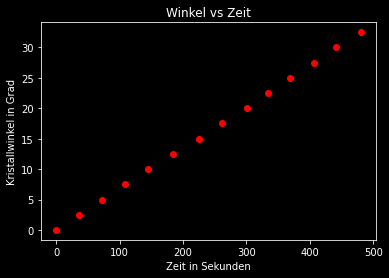

In [27]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.scatter(zeiten, winkel, color="red")
plt.title("Winkel vs Zeit")
plt.ylabel("Kristallwinkel in Grad")
plt.xlabel("Zeit in Sekunden")
plt.show()


### Funktion der Geraden berechnen => Steigung

[-1.63338932e-12  1.69566507e-09 -5.40468140e-07  4.66451880e-05
  6.90367180e-02 -2.59064266e-02]
Steigung = 0.0675



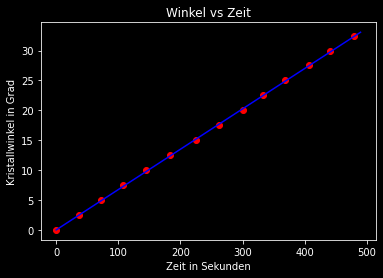

In [28]:
import numpy as np
x = np.array(zeiten)
y = np.array(winkel)
steigung = np.polyfit(x, y, 1)[0]
print(np.polyfit(x, y, 5))
print("Steigung = " + str(round(steigung*10000)/10000) + "\n")

x_gen = []
y_gen = []
i = 0
while i < 50:
    x_gen.append(i * 10)
    y_gen.append(x_gen[i]*steigung)
    i += 1

plt.style.use("dark_background")
plt.scatter(zeiten, winkel, color="red")
plt.plot(x_gen, y_gen, color="blue")
plt.title("Winkel vs Zeit")
plt.ylabel("Kristallwinkel in Grad")
plt.xlabel("Zeit in Sekunden")
plt.show()
plt.show()


### Die Rohdaten des Messversuchs importieren und bereinigen

In [29]:
zeiten = []
teilchen = []
file = open(os.path.join(path, "data/Rohdaten1.txt"), "r")
for line in file:
    x = line.split()
    zeiten.append(float(x[0].replace("\u200e", "").replace(",", ".")))
    teilchen.append(int(x[1]))
file.close()

### Bragg Gleichung benutzen um Winkel zu Wellenlänge umzurechnen

`k * λ = 2 * d * sin(α)`

Da k für die ersten Ausschläge gleich 1 ist, wird es im weiteren vernachlässigt:

`λ = 2 * d * sin(α)`

Für α kann man mithilfe der Steigung in Abhängigkeit von der Zeit die Werte generieren:

`α = m * t`

Somit ergibt sich als finale Gleichung:

`λ = 2 * d * sin(m * t)`


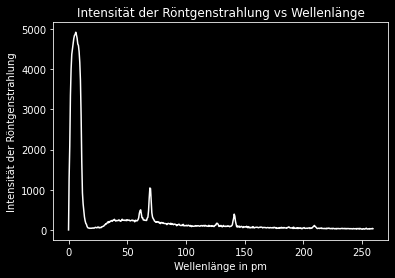

In [30]:
import math as m
wellenlänge = []
d = 201
for zeit in zeiten:
    wellenlänge.append(2 * d * m.sin(m.radians(steigung * zeit)))
daten = datenspeicher = np.array([wellenlänge, teilchen])
plt.plot(daten[0], daten[1], color="white")
plt.title("Intensität der Röntgenstrahlung vs Wellenlänge")
plt.xlabel("Wellenlänge in pm")
plt.ylabel("Intensität der Röntgenstrahlung")
plt.show()

### Zusätzliche Berechnungen zur Bestimmung der Spikes

 - Einschränken der Daten auf einen kleineren Bereich zum Ausschließen der hohen Anfangswerte

 - Herausfinden des Maximums der Werte

 - Graphisch darstellen sowie die Wellenlänge beim Maximum angeben

69 1043


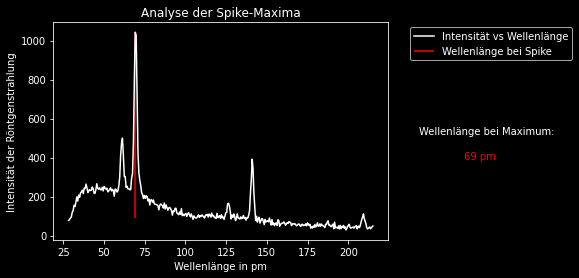

In [33]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(vonint, bisint):
    von = vonint
    bis = bisint
    daten = datenspeicher[:, von:bis]
    loc_max = int(daten[1].argmax())
    max_y = daten[1, loc_max]
    max_x = daten[0, loc_max]
    print(int(max_x), int(max_y))
    plt.plot(daten[0], daten[1], color="white", label="Intensität vs Wellenlänge")
    plt.title("Analyse der Spike-Maxima")
    plt.xlabel("Wellenlänge in pm")
    plt.ylabel("Intensität der Röntgenstrahlung")

    plt.text(x=((daten[0, -1]-daten[0, 0])*1.15 + daten[0, 0]), y=max_y/2, s="Wellenlänge bei Maximum:" )
    plt.text(x=((daten[0, -1]-daten[0, 0])*1.3 + daten[0, 0]), y=max_y/8*3, s=str(round(max_x)) + " pm", color="red")
    plt.vlines(x=max_x, ymin=90, ymax=max_y, colors="red", label="Wellenlänge bei Spike")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

if False:
    a = widgets.IntSlider(min=1, max=len(datenspeicher[0])-2, step=1, value=50)
    b = widgets.IntSlider(min=2, max=len(datenspeicher[0])-1, step=1, value=200)
    ui = widgets.HBox([a, b])
    out = widgets.interactive_output(f, {"vonint": a, "bisint": b})
    display(ui, out)
else:
    f(50, 400)

